## Group Project - AT&T.




**4.	Technical Analysis & Monte Carlo Simulation (4 marks)**

Perform technical analysis in Python on the 2023 values stock you have selected. Create the Bollinger Bands for the stock. Also perform Monte Carlo simulation on the stock. Develop the simulation using stock prices from January 1, 2023, through December 31, 2023, and simulate the stock price for January 1, 2024 through December 31, 2024.  Perform 10,000 simulations and calculate the average and standard deviation of the return on the stock.


In [2]:
#!pip install fbprophet


In [3]:
#1. Get the selected stock data for 2023.

import pandas as pd
import matplotlib.pyplot as plt
import ta
import yfinance as yf
import numpy as np 

# Download Coca-Cola stock data for 2023
df = yf.download('T', start='2023-01-01', end='2023-12-31')

# Extract closing prices
close_prices = df['Close']


[*********************100%%**********************]  1 of 1 completed


In [4]:
df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,18.510000,18.850000,18.410000,18.740000,17.000051,42149200
2023-01-04,18.870001,19.370001,18.809999,19.139999,17.362913,43926800
2023-01-05,19.139999,19.320000,18.959999,19.209999,17.426414,31081800
2023-01-06,19.350000,19.790001,19.340000,19.530001,17.716702,36050300
2023-01-09,19.240000,19.240000,18.980000,19.040001,17.521610,51981100
2023-01-10,19.350000,19.480000,19.200001,19.469999,17.917316,32869500
2023-01-11,19.469999,19.490000,19.250000,19.410000,17.862101,30010200
2023-01-12,19.480000,19.570000,19.370001,19.410000,17.862101,31740400
2023-01-13,19.389999,19.590000,19.290001,19.549999,17.990936,25480000


In [5]:
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-15,16.520000,16.660000,16.450001,16.520000,15.992878,65897600
2023-12-18,16.600000,16.750000,16.410000,16.459999,15.934792,34621800
2023-12-19,16.430000,16.620001,16.410000,16.610001,16.080008,28077400
2023-12-20,16.570000,16.610001,16.400000,16.400000,15.876707,33476300
2023-12-21,16.469999,16.510000,16.350000,16.490000,15.963836,36327900
2023-12-22,16.500000,16.730000,16.500000,16.549999,16.021921,26736000
2023-12-26,16.500000,16.610001,16.440001,16.570000,16.041283,22750400
2023-12-27,16.490000,16.620001,16.450001,16.580000,16.050962,27728700
2023-12-28,16.540001,16.870001,16.530001,16.740000,16.205858,32112900


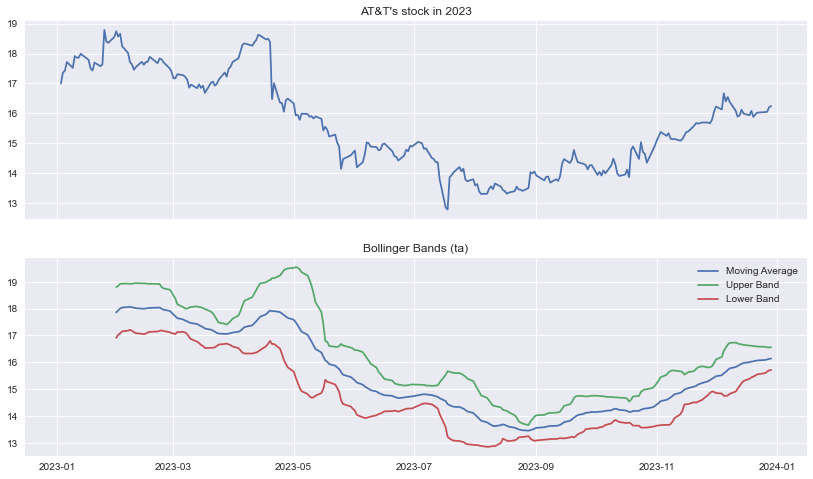

In [6]:
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [14, 8]

fig, ax = plt.subplots(2, 1, sharex=True)

# Plot Coca-Cola's stock in 2023
ax[0].plot(df['Adj Close'])
ax[0].set_title("AT&T's stock in 2023")

# Bollinger Bands
ta_bbands= ta.volatility.BollingerBands(close= df['Adj Close'],
                                       window= 20,
                                       window_dev= 2)

ta_df= df.copy()

ta_df['bb_ma']= ta_bbands.bollinger_mavg()
ta_df['bb_high']= ta_bbands.bollinger_hband()
ta_df['bb_low']= ta_bbands.bollinger_lband()

# Plot Bollinger Bands
ax[1].plot(ta_df.index, ta_df['bb_ma'], label='Moving Average')
ax[1].plot(ta_df.index, ta_df['bb_high'], label='Upper Band')
ax[1].plot(ta_df.index, ta_df['bb_low'], label='Lower Band')
ax[1].set_title('Bollinger Bands (ta)')
ax[1].legend()

plt.show()

Dates when stock price touches Lower Bollinger Band:
['2023-03-09', '2023-04-20', '2023-04-24', '2023-04-26', '2023-05-19', '2023-05-23', '2023-05-24', '2023-05-25', '2023-07-14', '2023-07-17', '2023-07-18']

Dates when stock price touches Upper Bollinger Band:
['2023-03-29', '2023-03-30', '2023-03-31', '2023-04-03', '2023-04-04', '2023-04-05', '2023-04-06', '2023-08-29', '2023-08-30', '2023-08-31', '2023-09-14', '2023-09-15', '2023-09-20', '2023-10-19', '2023-10-20', '2023-10-24', '2023-11-30', '2023-12-01', '2023-12-05']


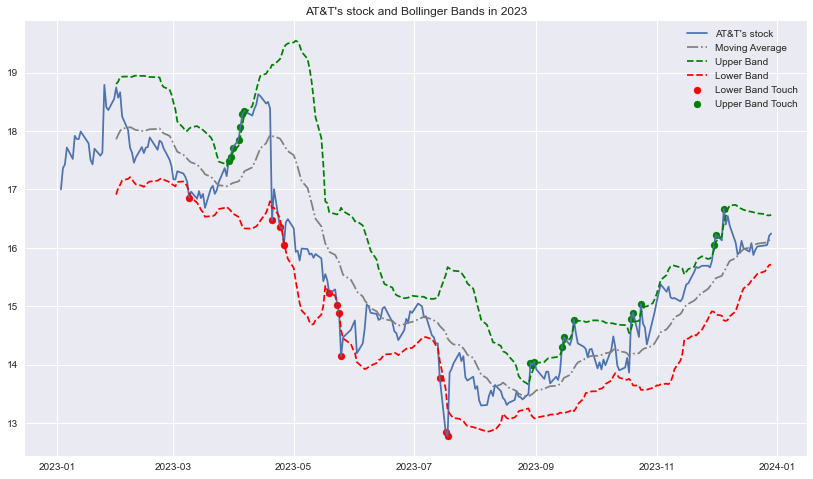

In [7]:
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [14, 8]

# Plot Coca-Cola's stock in 2023
plt.plot(df.index, df['Adj Close'], label="AT&T's stock")
plt.title("AT&T's stock and Bollinger Bands in 2023")

# Plot Bollinger Bands
plt.plot(ta_df.index, ta_df['bb_ma'], label='Moving Average', linestyle='-.', color = "grey")
plt.plot(ta_df.index, ta_df['bb_high'], label='Upper Band', linestyle='--', color = "green")
plt.plot(ta_df.index, ta_df['bb_low'], label='Lower Band', linestyle='--', color = "red")

# Markers for when stock price touches lower and upper bands
lower_band_touch = df[df['Adj Close'] <= ta_df['bb_low']]
upper_band_touch = df[df['Adj Close'] >= ta_df['bb_high']]
plt.scatter(lower_band_touch.index, lower_band_touch['Adj Close'], color='red', label='Lower Band Touch')
plt.scatter(upper_band_touch.index, upper_band_touch['Adj Close'], color='green', label='Upper Band Touch')

# Print dates when stock price touches lower and upper bands
print("Dates when stock price touches Lower Bollinger Band:")
print(lower_band_touch.index.strftime('%Y-%m-%d').tolist())

print("\nDates when stock price touches Upper Bollinger Band:")
print(upper_band_touch.index.strftime('%Y-%m-%d').tolist())
plt.legend()
plt.show()

In [8]:
#3. Monte Carlo Simulation

# Calculate logarithmic returns
log_returns = np.log(df['Adj Close'] / df['Adj Close'].shift(1))

# Parameters for the simulation
num_simulations = 10000
num_days = 365  # Trading days in a year

# Array to store simulation results
simulation_results = np.zeros((num_simulations, num_days))

# Perform the simulations
for i in range(num_simulations):
    daily_returns = np.random.choice(log_returns[1:], size=num_days, replace=True)
    simulation_results[i] = np.exp(daily_returns).cumprod()

# Calculate the average and standard deviation of the final returns of each simulation
final_returns = simulation_results[:, -1]
average_return = np.mean(final_returns)
std_dev_return = np.std(final_returns)

print("Average Return:", average_return)
print("Standard Deviation of Return:", std_dev_return)

Average Return: 0.9882448681033753
Standard Deviation of Return: 0.3283173774894791


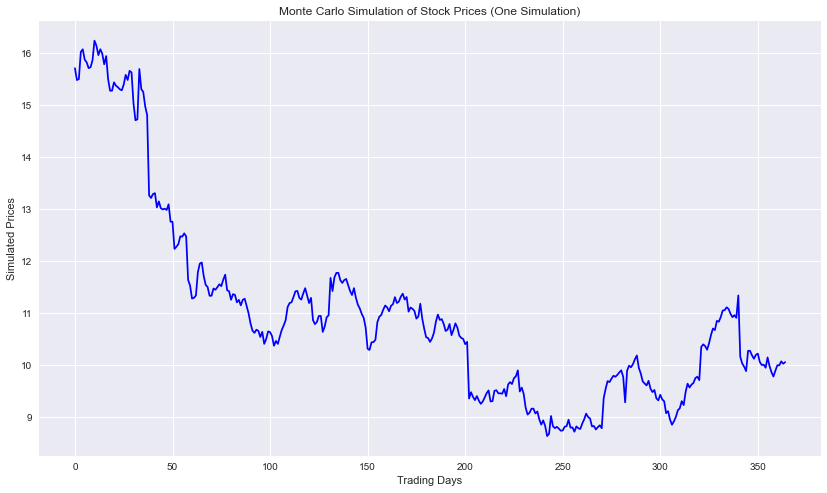

In [9]:
# Calculate logarithmic returns
log_returns = np.log(df['Adj Close'] / df['Adj Close'].shift(1))

# Parameters for the simulation
num_simulations = 10000
num_days = 365  # Trading days in a year

# Array to store simulation results
simulation_results = np.zeros((num_simulations, num_days))

# Perform the simulations
for i in range(num_simulations):
    # Select the last ten days of 2023 stock data as the starting point
    start_index = df.index.get_loc('2023-12-29') - 9
    start_price = df['Adj Close'].iloc[start_index]

    # Generate daily returns using the starting price
    daily_returns = np.random.choice(log_returns[1:], size=num_days, replace=True)
    simulation_results[i] = np.exp(daily_returns).cumprod() * start_price

# Choose one simulation to plot (for example, the first simulation)
simulation_index = 1000
simulation = simulation_results[simulation_index]

# Plot the selected simulation
plt.figure(figsize=(14, 8))
plt.plot(range(num_days), simulation, color='blue')
plt.title('Monte Carlo Simulation of Stock Prices (One Simulation)')
plt.xlabel('Trading Days')
plt.ylabel('Simulated Prices')
plt.grid(True)
plt.show()


**5.	Stock Signals (2.5 marks)**

Identify the buy and sell signals for the stock from January 1, 2023, through December 31, 2023, using Simple Moving Average and Exponential Moving Average techniques. For both cases, use 30 days for the short-term moving average and 90 days for the long-term moving average.


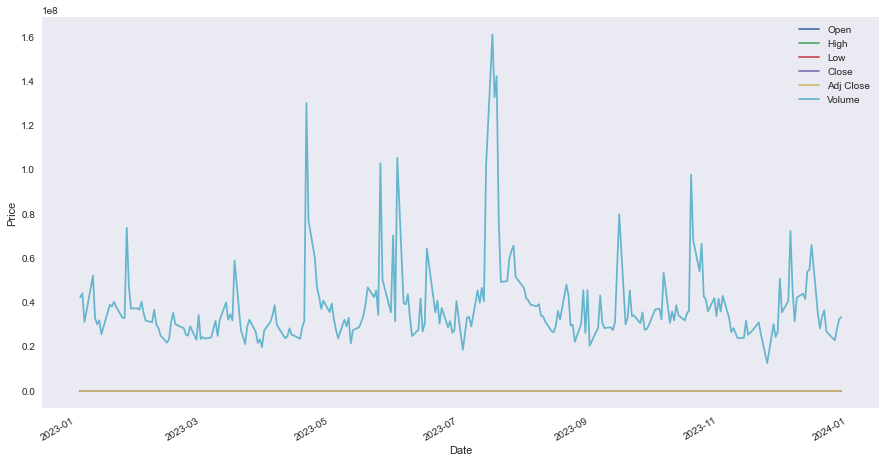

In [10]:
# EMA
df.plot(figsize=(15, 8))
plt.grid()
plt.ylabel("Price")
plt.show()

In [11]:
# EMA for 30 days
df['EMA_30'] = df['Adj Close'].ewm(span=30, adjust=False).mean()

# EMA for 90 days
df['EMA_90'] = df['Adj Close'].ewm(span=90, adjust=False).mean()


In [12]:
df['Signal'] = 0.0  
df['Signal'] = np.where(df['EMA_30'] > df['EMA_90'], 1.0, 0.0)
df['Position'] = df['Signal'].diff()
df

,Open,High,Low,Close,Adj Close,Volume,EMA_30,EMA_90,Signal,Position
Date,,,,,,,,,,
2023-01-03,18.510000,18.850000,18.410000,18.740000,17.000051,42149200,17.000051,17.000051,0.0,NaN
2023-01-04,18.870001,19.370001,18.809999,19.139999,17.362913,43926800,17.023462,17.008026,1.0,1.0
2023-01-05,19.139999,19.320000,18.959999,19.209999,17.426414,31081800,17.049459,17.017222,1.0,0.0
2023-01-06,19.350000,19.790001,19.340000,19.530001,17.716702,36050300,17.092507,17.032595,1.0,0.0
2023-01-09,19.240000,19.240000,18.980000,19.040001,17.521610,51981100,17.120191,17.043343,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2023-12-22,16.500000,16.730000,16.500000,16.549999,16.021921,26736000,15.796329,15.193004,1.0,0.0
2023-12-26,16.500000,16.610001,16.440001,16.570000,16.041283,22750400,15.812132,15.211647,1.0,0.0
2023-12-27,16.490000,16.620001,16.450001,16.580000,16.050962,27728700,15.827541,15.230094,1.0,0.0


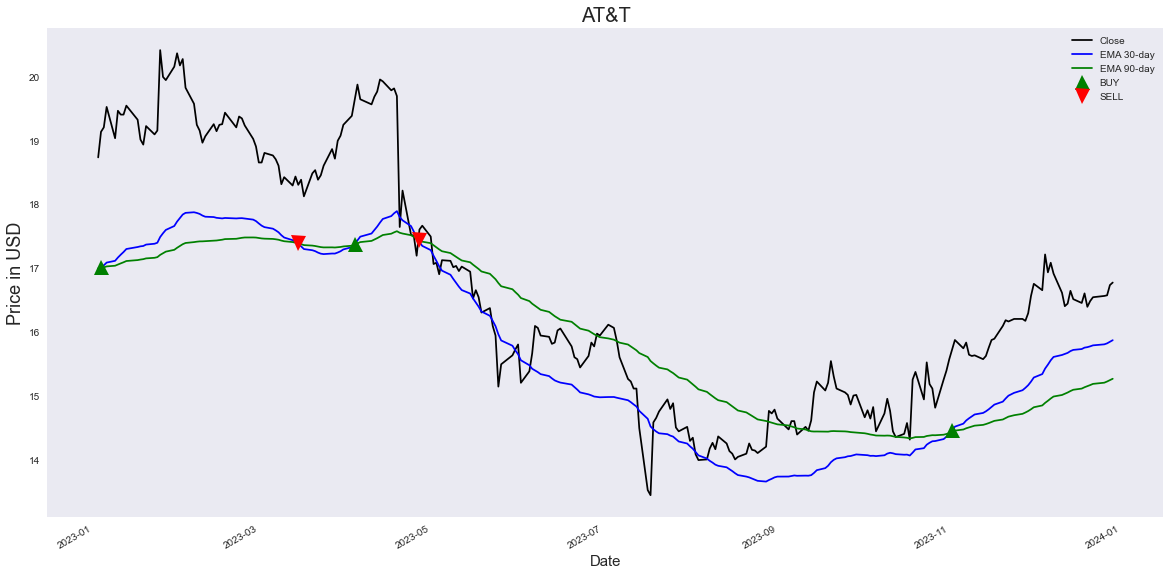

Dates for buy signals:
['2023-01-04', '2023-04-04', '2023-11-02']

Dates for sell signals:
['2023-03-15', '2023-04-27']


In [13]:
plt.figure(figsize=(20, 10))
# Plot close price, short-term and long-term moving averages 
df['Close'].plot(color='k', label='Close') 
df['EMA_30'].plot(color='b', label='EMA 30-day') 
df['EMA_90'].plot(color='g', label='EMA 90-day')

# Plot ‘buy’ signals
buy_dates = df.index[df['Position'] == 1]
plt.plot(buy_dates, df['EMA_30'][df['Position'] == 1], 
         '^', markersize=15, color='g', label='BUY')

# Plot ‘sell’ signals
sell_dates = df.index[df['Position'] == -1]
plt.plot(sell_dates, df['EMA_90'][df['Position'] == -1], 
         'v', markersize=15, color='r', label='SELL')

plt.ylabel('Price in USD', fontsize=18)
plt.xlabel('Date', fontsize=15)
plt.title('AT&T', fontsize=20)
plt.legend()
plt.grid()
plt.show()

# Print dates for buy and sell signals
print("Dates for buy signals:")
print(buy_dates.strftime('%Y-%m-%d').tolist())

print("\nDates for sell signals:")
print(sell_dates.strftime('%Y-%m-%d').tolist())


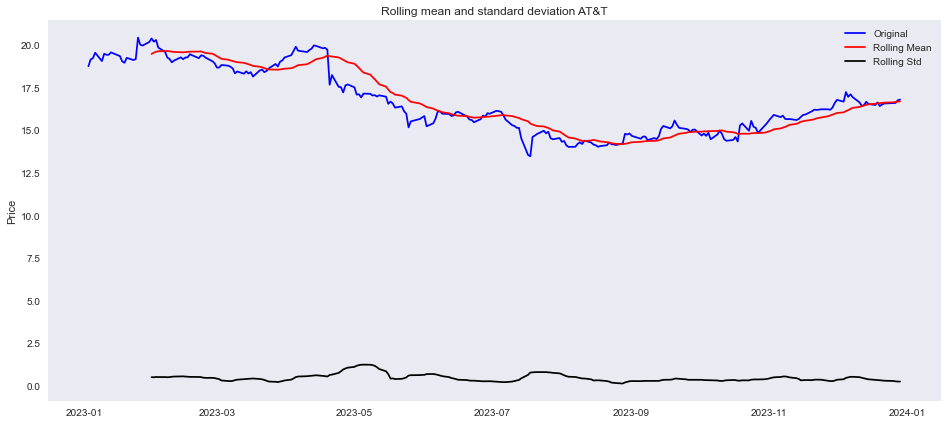

In [14]:
# SMA
import datetime
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')

# code for rolling mean
# code for rolling STD
rolling_mean = df['Close'].rolling(window=20).mean()
rolling_std = df['Close'].rolling(window=20).std()

plt.figure(figsize = (16, 7))
fig=plt.figure(1)

orig = plt.plot(df['Close'],color='blue',label='Original')
mean = plt.plot(rolling_mean,color='red',label='Rolling Mean')
std = plt.plot(rolling_std,color='black',label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling mean and standard deviation ' + 'AT&T')
plt.grid()
plt.ylabel("Price")
plt.show()

In [15]:
# Convert the 'Close' column to numeric, coercing errors to NaN
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')

# create 20 days simple moving average column
df['SMA_30'] = df['Close'].rolling(window=30, min_periods= 1).mean()
# create 50 days simple moving average column
df['SMA_90'] = df['Close'].rolling(window=90, min_periods= 1).mean()
# display first few rows
df.head()

,Open,High,Low,Close,Adj Close,Volume,EMA_30,EMA_90,Signal,Position,SMA_30,SMA_90
Date,,,,,,,,,,,,
2023-01-03,18.510000,18.850000,18.410000,18.740000,17.000051,42149200,17.000051,17.000051,0.0,NaN,18.740000,18.740000
2023-01-04,18.870001,19.370001,18.809999,19.139999,17.362913,43926800,17.023462,17.008026,1.0,1.0,18.940000,18.940000
2023-01-05,19.139999,19.320000,18.959999,19.209999,17.426414,31081800,17.049459,17.017222,1.0,0.0,19.029999,19.029999
2023-01-06,19.350000,19.790001,19.340000,19.530001,17.716702,36050300,17.092507,17.032595,1.0,0.0,19.155000,19.155000
2023-01-09,19.240000,19.240000,18.980000,19.040001,17.521610,51981100,17.120191,17.043343,1.0,0.0,19.132000,19.132000


In [16]:
df['Signal'] = 0.0
df['Signal'] = np.where(df['SMA_30'] > df['SMA_90'], 1.0, 0.0)
df['Position'] = df['Signal'].diff()
# display first few rows
df.head()

,Open,High,Low,Close,Adj Close,Volume,EMA_30,EMA_90,Signal,Position,SMA_30,SMA_90
Date,,,,,,,,,,,,
2023-01-03,18.510000,18.850000,18.410000,18.740000,17.000051,42149200,17.000051,17.000051,0.0,NaN,18.740000,18.740000
2023-01-04,18.870001,19.370001,18.809999,19.139999,17.362913,43926800,17.023462,17.008026,0.0,0.0,18.940000,18.940000
2023-01-05,19.139999,19.320000,18.959999,19.209999,17.426414,31081800,17.049459,17.017222,0.0,0.0,19.029999,19.029999
2023-01-06,19.350000,19.790001,19.340000,19.530001,17.716702,36050300,17.092507,17.032595,0.0,0.0,19.155000,19.155000
2023-01-09,19.240000,19.240000,18.980000,19.040001,17.521610,51981100,17.120191,17.043343,0.0,0.0,19.132000,19.132000


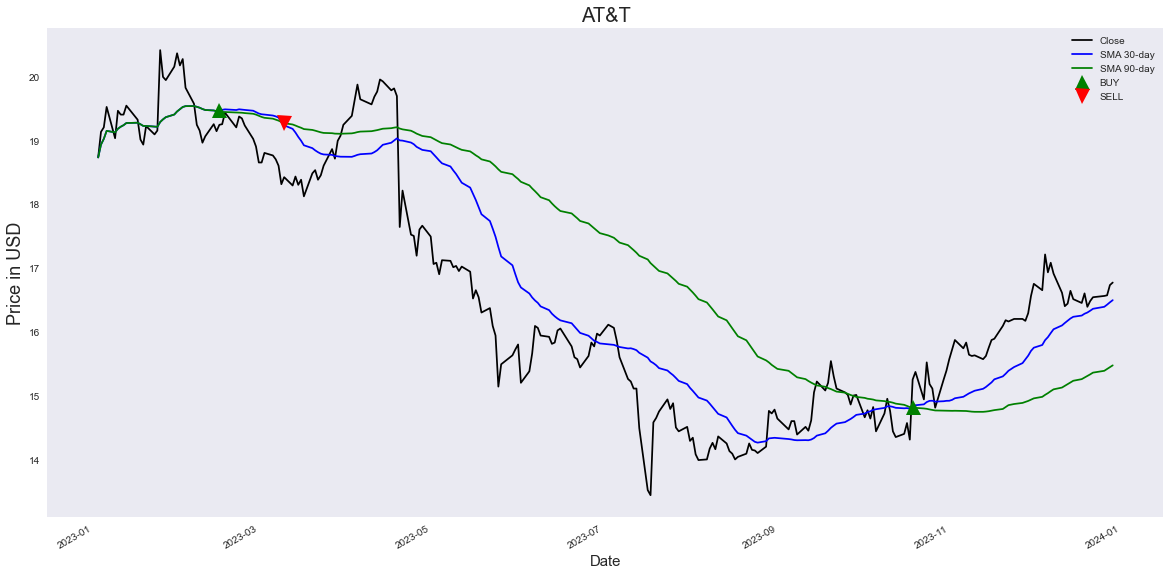

Dates for buy signals:
['2023-02-15', '2023-10-19']

Dates for sell signals:
['2023-03-10']


In [17]:
plt.figure(figsize=(20,10))
# plot close price, short-term and long-term moving averages 
df['Close'].plot(color='k', label='Close') 
df['SMA_30'].plot(color='b', label='SMA 30-day') 
df['SMA_90'].plot(color='g', label='SMA 90-day')

# plot ‘buy’ signals
buy_dates = df.index[df['Position'] == 1]
plt.plot(buy_dates, df['SMA_30'][df['Position'] == 1], 
         '^', markersize=15, color='g', label='BUY')

# plot ‘sell’ signals
sell_dates = df.index[df['Position'] == -1]
plt.plot(sell_dates, df['SMA_90'][df['Position'] == -1], 
         'v', markersize=15, color='r', label='SELL')

plt.ylabel('Price in USD', fontsize=18)
plt.xlabel('Date', fontsize=15)
plt.title('AT&T', fontsize=20)
plt.legend()
plt.grid()
plt.show()

# Print dates for buy and sell signals
print("Dates for buy signals:")
print(buy_dates.strftime('%Y-%m-%d').tolist())

print("\nDates for sell signals:")
print(sell_dates.strftime('%Y-%m-%d').tolist())


**6.	Forecasting (2.5 marks)**

Using Facebook Prophet, generate a prediction of the stock price. Use January 1, 2023, through December 31, 2023, to create the model, then create the projection for January 1, 2024 through December 31, 2024.


In [18]:
from prophet import Prophet

13:19:53 - cmdstanpy - INFO - Chain [1] start processing
13:19:53 - cmdstanpy - INFO - Chain [1] done processing


Lowest Predicted Price: 11.181175809171782 on 2024-08-20 00:00:00
Highest Predicted Price: 18.115408536040885 on 2024-01-27 00:00:00


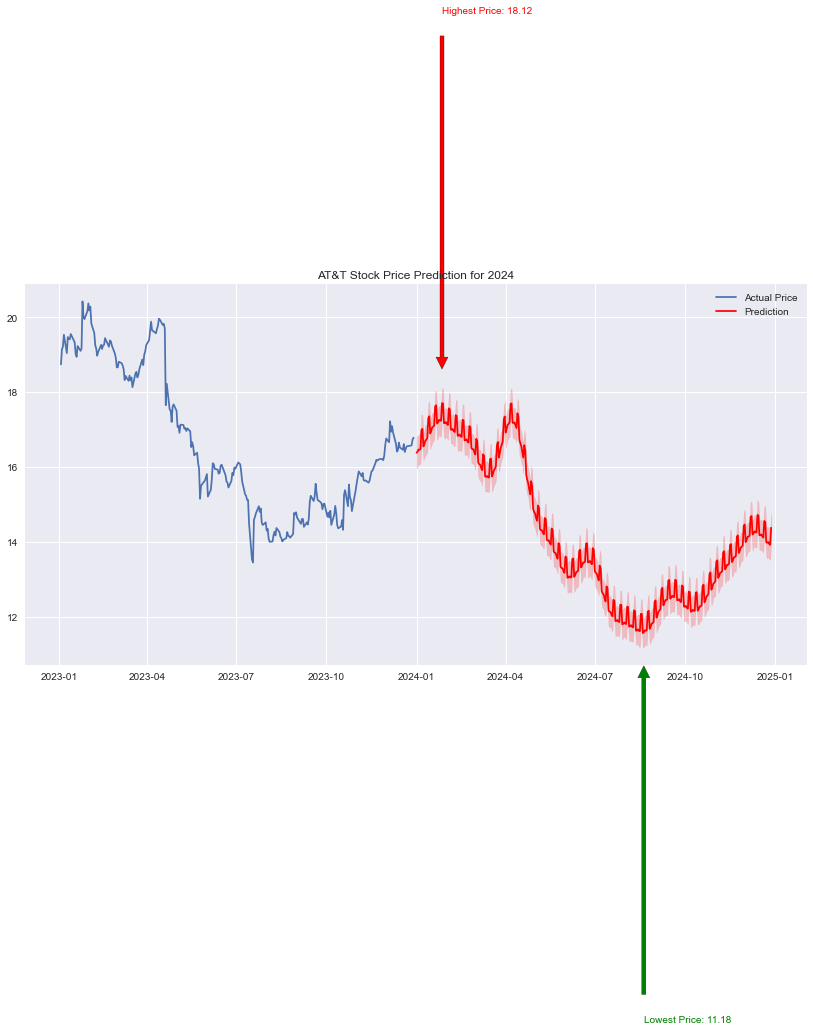

In [19]:
# Prepare the data for Prophet
df_prophet = pd.DataFrame({'ds': close_prices.index, 'y': close_prices.values})

# Create and fit the model
model = Prophet(daily_seasonality=False, yearly_seasonality=True)
model.fit(df_prophet)

# Create a DataFrame for future dates
future_dates = model.make_future_dataframe(periods=365)

# Make the prediction
forecast = model.predict(future_dates)

# Filter predictions for 2024
forecast_2024 = forecast[(forecast['ds'] >= '2024-01-01') & (forecast['ds'] <= '2024-12-31')]

# Find the lowest and highest predicted prices
lowest_price = forecast_2024['yhat_lower'].min()
highest_price = forecast_2024['yhat_upper'].max()

# Find the dates corresponding to the lowest and highest prices
lowest_date = forecast_2024.loc[forecast_2024['yhat_lower'].idxmin(), 'ds']
highest_date = forecast_2024.loc[forecast_2024['yhat_upper'].idxmax(), 'ds']

print("Lowest Predicted Price:", lowest_price, "on", lowest_date)
print("Highest Predicted Price:", highest_price, "on", highest_date)

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(close_prices, label='Actual Price')
plt.plot(forecast_2024['ds'], forecast_2024['yhat'], label='Prediction', color='red')
plt.fill_between(forecast_2024['ds'], forecast_2024['yhat_lower'], forecast_2024['yhat_upper'], color='red', alpha=0.2)

# Annotate lowest predicted price
plt.annotate('Lowest Price: {:.2f}'.format(lowest_price),
             xy=(lowest_date, lowest_price),
             xytext=(lowest_date, lowest_price - 10),
             arrowprops=dict(facecolor='green', shrink=0.05),
             fontsize=10,
             color='green')

# Annotate highest predicted price
plt.annotate('Highest Price: {:.2f}'.format(highest_price),
             xy=(highest_date, highest_price),
             xytext=(highest_date, highest_price + 10),
             arrowprops=dict(facecolor='red', shrink=0.05),
             fontsize=10,
             color='red')

plt.title('AT&T Stock Price Prediction for 2024')
plt.legend()
plt.show()


In [20]:
df

,Open,High,Low,Close,Adj Close,Volume,EMA_30,EMA_90,Signal,Position,SMA_30,SMA_90
Date,,,,,,,,,,,,
2023-01-03,18.510000,18.850000,18.410000,18.740000,17.000051,42149200,17.000051,17.000051,0.0,NaN,18.740000,18.740000
2023-01-04,18.870001,19.370001,18.809999,19.139999,17.362913,43926800,17.023462,17.008026,0.0,0.0,18.940000,18.940000
2023-01-05,19.139999,19.320000,18.959999,19.209999,17.426414,31081800,17.049459,17.017222,0.0,0.0,19.029999,19.029999
2023-01-06,19.350000,19.790001,19.340000,19.530001,17.716702,36050300,17.092507,17.032595,0.0,0.0,19.155000,19.155000
2023-01-09,19.240000,19.240000,18.980000,19.040001,17.521610,51981100,17.120191,17.043343,0.0,0.0,19.132000,19.132000
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,16.500000,16.730000,16.500000,16.549999,16.021921,26736000,15.796329,15.193004,1.0,0.0,16.369000,15.369333
2023-12-26,16.500000,16.610001,16.440001,16.570000,16.041283,22750400,15.812132,15.211647,1.0,0.0,16.400000,15.397778
2023-12-27,16.490000,16.620001,16.450001,16.580000,16.050962,27728700,15.827541,15.230094,1.0,0.0,16.433333,15.425889


In [21]:
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt

# Assuming you have 'close_prices' DataFrame containing AT&T stock prices indexed by date

# Prepare the data for Prophet
df_prophet = pd.DataFrame({'ds': close_prices.index, 'y': close_prices.values})

# Create and fit the model
model = Prophet(daily_seasonality=False, yearly_seasonality=True)
model.fit(df_prophet)

# Make future predictions for 2024
future_dates = model.make_future_dataframe(periods=365, freq='D')
forecast = model.predict(future_dates)

# Filter predictions for 2024
forecast_2024 = forecast[(forecast['ds'] >= '2024-01-01') & (forecast['ds'] <= '2024-12-31')]

# Find the lowest and highest predicted prices
lowest_price = forecast_2024['yhat_lower'].min()
highest_price = forecast_2024['yhat_upper'].max()

# Find the dates corresponding to the lowest and highest prices
lowest_date = forecast_2024.loc[forecast_2024['yhat_lower'].idxmin(), 'ds']
highest_date = forecast_2024.loc[forecast_2024['yhat_upper'].idxmax(), 'ds']

print("Lowest Predicted Price:", lowest_price, "on", lowest_date)
print("Highest Predicted Price:", highest_price, "on", highest_date)

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(close_prices.index, close_prices.values, label='Actual Price')
plt.plot(forecast_2024['ds'], forecast_2024['yhat'], label='Prediction', color='red')
plt.fill_between(forecast_2024['ds'], forecast_2024['yhat_lower'], forecast_2024['yhat_upper'], color='red', alpha=0.2)

# Annotate lowest predicted price
plt.annotate('Lowest Price: {:.2f}'.format(lowest_price),
             xy=(lowest_date, lowest_price),
             xytext=(lowest_date, lowest_price - 10),
             arrowprops=dict(facecolor='green', shrink=0.05),
             fontsize=10,
             color='green')

# Annotate highest predicted price
plt.annotate('Highest Price: {:.2f}'.format(highest_price),
             xy=(highest_date, highest_price),
             xytext=(highest_date, highest_price + 10),
             arrowprops=dict(facecolor='red', shrink=0.05),
             fontsize=10,
             color='red')

plt.title('AT&T Stock Price Prediction for 2024')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


ModuleNotFoundError: No module named 'fbprophet'

13:20:08 - cmdstanpy - INFO - Chain [1] start processing
13:20:08 - cmdstanpy - INFO - Chain [1] done processing


Lowest Predicted Price: 11.799818160773455 on 2024-08-19 00:00:00
Highest Predicted Price: 17.885485135369024 on 2024-04-07 00:00:00


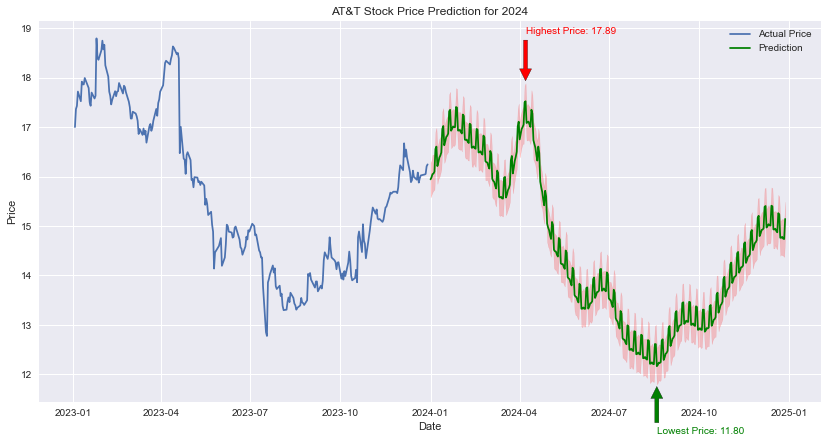

In [22]:


# Assuming you have 'df' DataFrame containing AT&T stock data indexed by date

# Prepare the data for Prophet
df_prophet = pd.DataFrame({'ds': df.index, 'y': df['Adj Close'].values})

# Create and fit the model
model = Prophet(daily_seasonality=False, yearly_seasonality=True)
model.fit(df_prophet)

# Make future predictions for 2024
future_dates = model.make_future_dataframe(periods=365, freq='D')
forecast = model.predict(future_dates)

# Filter predictions for 2024
forecast_2024 = forecast[(forecast['ds'] >= '2024-01-01') & (forecast['ds'] <= '2024-12-31')]

# Find the lowest and highest predicted prices
lowest_price = forecast_2024['yhat_lower'].min()
highest_price = forecast_2024['yhat_upper'].max()

# Find the dates corresponding to the lowest and highest prices
lowest_date = forecast_2024.loc[forecast_2024['yhat_lower'].idxmin(), 'ds']
highest_date = forecast_2024.loc[forecast_2024['yhat_upper'].idxmax(), 'ds']

print("Lowest Predicted Price:", lowest_price, "on", lowest_date)
print("Highest Predicted Price:", highest_price, "on", highest_date)

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Adj Close'], label='Actual Price')
plt.plot(forecast_2024['ds'], forecast_2024['yhat'], label='Prediction', color='green')
plt.fill_between(forecast_2024['ds'], forecast_2024['yhat_lower'], forecast_2024['yhat_upper'], color='red', alpha=0.2)

# Annotate lowest predicted price
plt.annotate('Lowest Price: {:.2f}'.format(lowest_price),
             xy=(lowest_date, lowest_price),
             xytext=(lowest_date, lowest_price - 1),  # Adjusting position for visibility
             arrowprops=dict(facecolor='green', shrink=0.05),
             fontsize=10,
             color='green')

# Annotate highest predicted price
plt.annotate('Highest Price: {:.2f}'.format(highest_price),
             xy=(highest_date, highest_price),
             xytext=(highest_date, highest_price + 1),  # Adjusting position for visibility
             arrowprops=dict(facecolor='red', shrink=0.05),
             fontsize=10,
             color='red')

plt.title('AT&T Stock Price Prediction for 2024')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have 'df' DataFrame containing AT&T stock data indexed by date

# Prepare the data for Prophet
df_prophet = pd.DataFrame({'ds': df.index, 'y': df['Adj Close'].values})

# Create and fit the model
model = Prophet(daily_seasonality=False, yearly_seasonality=True)
model.fit(df_prophet)

# Make future predictions for 2024
future_dates = model.make_future_dataframe(periods=365, freq='D')
forecast = model.predict(future_dates)

# Filter predictions for 2024
forecast_2024 = forecast[(forecast['ds'] >= '2024-01-01') & (forecast['ds'] <= '2024-12-31')]

# Find the lowest and highest predicted prices
lowest_price = forecast_2024['yhat_lower'].min()
highest_price = forecast_2024['yhat_upper'].max()

# Find the dates corresponding to the lowest and highest prices
lowest_date = forecast_2024.loc[forecast_2024['yhat_lower'].idxmin(), 'ds']
highest_date = forecast_2024.loc[forecast_2024['yhat_upper'].idxmax(), 'ds']

print("Lowest Predicted Price:", lowest_price, "on", lowest_date)
print("Highest Predicted Price:", highest_price, "on", highest_date)

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Adj Close'], label='Actual Price')
plt.plot(forecast_2024['ds'], forecast_2024['yhat'], label='Prediction', color='green')
plt.fill_between(forecast_2024['ds'], forecast_2024['yhat_lower'], forecast_2024['yhat_upper'], color='red', alpha=0.2)

# Annotate lowest predicted price
plt.text(lowest_date, lowest_price , 'Lowest Price: {:.2f}'.format(lowest_price), fontsize=10, color='green', ha='center')

# Annotate highest predicted price
plt.text(highest_date, highest_price , 'Highest Price: {:.2f}'.format(highest_price), fontsize=10, color='red', ha='center')

plt.title('AT&T Stock Price Prediction for 2024')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


13:20:15 - cmdstanpy - INFO - Chain [1] start processing
13:20:15 - cmdstanpy - INFO - Chain [1] done processing


Lowest Predicted Price: 11.800789332264992 on 2024-08-19 00:00:00
Highest Predicted Price: 17.8893611247956 on 2024-04-07 00:00:00


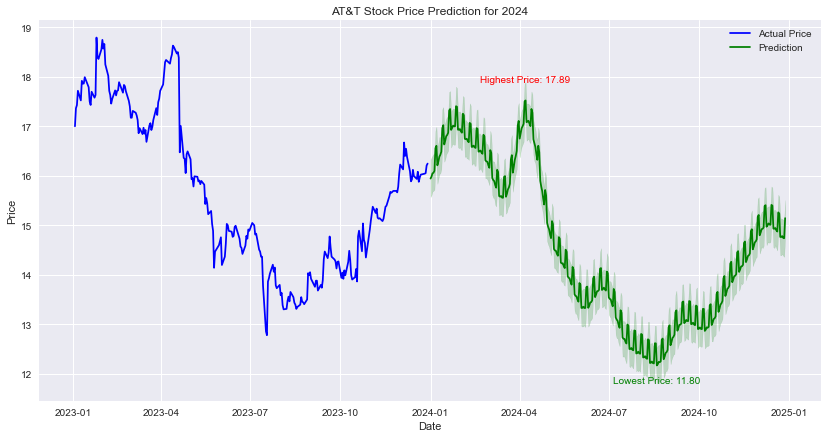

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have 'df' DataFrame containing AT&T stock data indexed by date

# Prepare the data for Prophet
df_prophet = pd.DataFrame({'ds': df.index, 'y': df['Adj Close'].values})

# Create and fit the model
model = Prophet(daily_seasonality=False, yearly_seasonality=True)
model.fit(df_prophet)

# Make future predictions for 2024
future_dates = model.make_future_dataframe(periods=365, freq='D')
forecast = model.predict(future_dates)

# Filter predictions for 2024
forecast_2024 = forecast[(forecast['ds'] >= '2024-01-01') & (forecast['ds'] <= '2024-12-31')]

# Find the lowest and highest predicted prices
lowest_price = forecast_2024['yhat_lower'].min()
highest_price = forecast_2024['yhat_upper'].max()

# Find the dates corresponding to the lowest and highest prices
lowest_date = forecast_2024.loc[forecast_2024['yhat_lower'].idxmin(), 'ds']
highest_date = forecast_2024.loc[forecast_2024['yhat_upper'].idxmax(), 'ds']

print("Lowest Predicted Price:", lowest_price, "on", lowest_date)
print("Highest Predicted Price:", highest_price, "on", highest_date)

# Plot the results
plt.figure(figsize=(14, 7))

# Plot actual prices
plt.plot(df.index, df['Adj Close'], label='Actual Price', color='blue')

# Plot predicted prices
plt.plot(forecast_2024['ds'], forecast_2024['yhat'], label='Prediction', color='green')

# Fill between predicted price range
plt.fill_between(forecast_2024['ds'], forecast_2024['yhat_lower'], forecast_2024['yhat_upper'], color='green', alpha=0.2)

# Annotate lowest predicted price
plt.text(lowest_date, lowest_price , 'Lowest Price: {:.2f}'.format(lowest_price), fontsize=10, color='green', ha='center')

# Annotate highest predicted price
plt.text(highest_date, highest_price , 'Highest Price: {:.2f}'.format(highest_price), fontsize=10, color='red', ha='center')

plt.title('AT&T Stock Price Prediction for 2024')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
df

In [ ]:
# Assuming your DataFrame 'df' has columns named 'Date' and 'Close', you can rename them to 'ds' and 'y'
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# Now, you can proceed with the Prophet forecasting


13:20:20 - cmdstanpy - INFO - Chain [1] start processing
13:20:20 - cmdstanpy - INFO - Chain [1] done processing


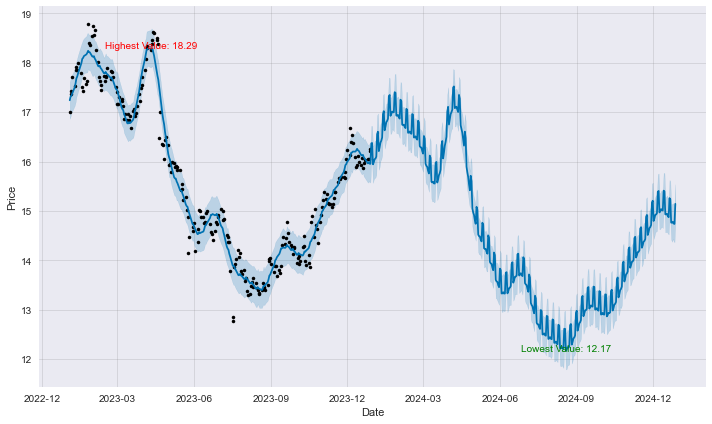

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing AT&T stock data

# Prepare the data for Prophet
df_prophet = pd.DataFrame({'ds': df.index, 'y': df['Adj Close'].values})

# Create and fit the model
model = Prophet(daily_seasonality=False, yearly_seasonality=True)
model.fit(df_prophet)

# Make future predictions
future_dates = model.make_future_dataframe(periods=365, freq='D')
forecast = model.predict(future_dates)

# Plot the forecast
fig = model.plot(forecast, xlabel='Date', ylabel='Price')

# Find highest and lowest values in the forecast
highest_value = forecast.loc[forecast['yhat'].idxmax()]
lowest_value = forecast.loc[forecast['yhat'].idxmin()]

# Annotate highest value
plt.text(highest_value['ds'], highest_value['yhat'], 'Highest Value: {:.2f}'.format(highest_value['yhat']),
         fontsize=10, color='red', ha='center')

# Annotate lowest value
plt.text(lowest_value['ds'], lowest_value['yhat'], 'Lowest Value: {:.2f}'.format(lowest_value['yhat']),
         fontsize=10, color='green', ha='center')

plt.show()


In [27]:
forecast_2024.to_excel('2024.xlsx', index=False)


13:26:32 - cmdstanpy - INFO - Chain [1] start processing
13:26:32 - cmdstanpy - INFO - Chain [1] done processing


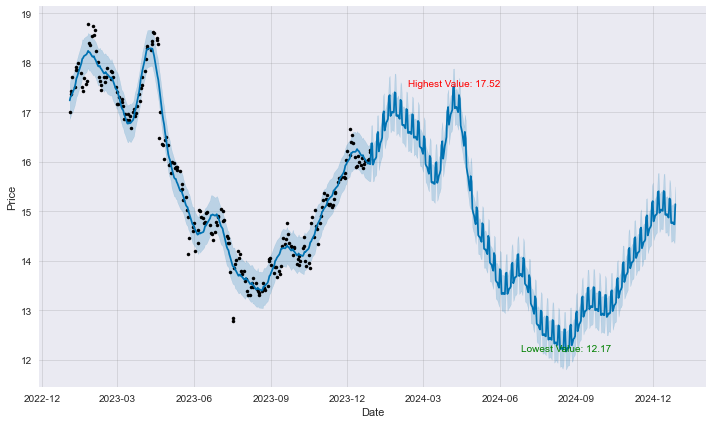

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing AT&T stock data

# Prepare the data for Prophet
df_prophet = pd.DataFrame({'ds': df.index, 'y': df['Adj Close'].values})

# Create and fit the model
model = Prophet(daily_seasonality=False, yearly_seasonality=True)
model.fit(df_prophet)

# Make future predictions
future_dates = model.make_future_dataframe(periods=365, freq='D')
forecast = model.predict(future_dates)

# Filter predictions for the year 2024
forecast_2024 = forecast[(forecast['ds'] >= '2024-01-01') & (forecast['ds'] <= '2024-12-31')]

# Find highest and lowest values in the forecast for 2024
highest_value_2024 = forecast_2024.loc[forecast_2024['yhat'].idxmax()]
lowest_value_2024 = forecast_2024.loc[forecast_2024['yhat'].idxmin()]

# Plot the forecast
fig = model.plot(forecast, xlabel='Date', ylabel='Price')

# Annotate highest value for 2024
plt.text(highest_value_2024['ds'], highest_value_2024['yhat'], 'Highest Value: {:.2f}'.format(highest_value_2024['yhat']),
         fontsize=10, color='red', ha='center')

# Annotate lowest value for 2024
plt.text(lowest_value_2024['ds'], lowest_value_2024['yhat'], 'Lowest Value: {:.2f}'.format(lowest_value_2024['yhat']),
         fontsize=10, color='green', ha='center')

plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing AT&T stock data

# Prepare the data for Prophet
df_prophet = pd.DataFrame({'ds': df.index, 'y': df['Adj Close'].values})

# Create and fit the model
model = Prophet(daily_seasonality=False, yearly_seasonality=True)
model.fit(df_prophet)

# Make future predictions
future_dates = model.make_future_dataframe(periods=365, freq='D')
forecast = model.predict(future_dates)

# Filter predictions for the year 2024
forecast_2024 = forecast[(forecast['ds'] >= '2024-01-01') & (forecast['ds'] <= '2024-12-31')]

# Find highest and lowest values in the forecast for 2024
highest_value_2024 = forecast_2024.loc[forecast_2024['yhat'].idxmax()]
lowest_value_2024 = forecast_2024.loc[forecast_2024['yhat'].idxmin()]

# Set a larger figure size
plt.figure(figsize=(15, 8))

# Plot the forecast
fig = model.plot(forecast, xlabel='Date', ylabel='Price')

# Annotate highest value for 2024
plt.text(highest_value_2024['ds'], highest_value_2024['yhat'], 'Highest Value: {:.2f}'.format(highest_value_2024['yhat']),
         fontsize=10, color='red', ha='center')

# Annotate lowest value for 2024
plt.text(lowest_value_2024['ds'], lowest_value_2024['yhat'], 'Lowest Value: {:.2f}'.format(lowest_value_2024['yhat']),
         fontsize=10, color='green', ha='center')

plt.show()


In [ ]:
forecast_2024

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing AT&T stock data

# Prepare the data for Prophet
df_prophet = pd.DataFrame({'ds': df.index, 'y': df['Adj Close'].values})

# Create and fit the model
model = Prophet(daily_seasonality=False, yearly_seasonality=True)
model.fit(df_prophet)

# Make future predictions
future_dates = model.make_future_dataframe(periods=365, freq='D')
forecast = model.predict(future_dates)

# Plot the forecast with uncertainty intervals
fig = model.plot(forecast, uncertainty=True)

# Annotate highest and lowest values
highest_value = forecast['yhat_upper'].max()
lowest_value = forecast['yhat_lower'].min()

plt.annotate('Highest Value: {:.2f}'.format(highest_value),
             xy=(forecast.loc[forecast['yhat_upper'].idxmax(), 'ds'], highest_value),
             xytext=(forecast.loc[forecast['yhat_upper'].idxmax(), 'ds'], highest_value + 1), 
             arrowprops=dict(facecolor='red', shrink=0.05),
             fontsize=10,
             color='red')

plt.annotate('Lowest Value: {:.2f}'.format(lowest_value),
             xy=(forecast.loc[forecast['yhat_lower'].idxmin(), 'ds'], lowest_value),
             xytext=(forecast.loc[forecast['yhat_lower'].idxmin(), 'ds'], lowest_value - 1), 
             arrowprops=dict(facecolor='green', shrink=0.05),
             fontsize=10,
             color='green')

plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have 'df' DataFrame containing AT&T stock data

# Plot style and figure size
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [14, 8]

# Plot AT&T's stock prices in 2023
plt.plot(df.index, df['Adj Close'], label="AT&T's stock")
plt.title("AT&T's stock and Bollinger Bands in 2023")

# Plot Bollinger Bands
plt.plot(df.index, df['EMA_30'], label='Moving Average', linestyle='-.', color='grey')  # Assuming 'EMA_30' is the moving average column
plt.plot(df.index, df['SMA_30'], label='Simple Moving Average', linestyle='--', color='green')  # Assuming 'SMA_30' is the simple moving average column
plt.plot(df.index, df['SMA_90'], label='90-day SMA', linestyle='--', color='red')  # Assuming 'SMA_90' is the 90-day SMA column

# Markers for when stock price touches lower and upper bands
lower_band_touch = df[df['Adj Close'] <= df['SMA_30']]
upper_band_touch = df[df['Adj Close'] >= df['SMA_90']]
plt.scatter(lower_band_touch.index, lower_band_touch['Adj Close'], color='red', label='Lower Band Touch')
plt.scatter(upper_band_touch.index, upper_band_touch['Adj Close'], color='green', label='Upper Band Touch')

# Print dates when stock price touches lower and upper bands
print("Dates when stock price touches Lower Bollinger Band:")
print(lower_band_touch.index.strftime('%Y-%m-%d').tolist())

print("\nDates when stock price touches Upper Bollinger Band:")
print(upper_band_touch.index.strftime('%Y-%m-%d').tolist())

# Labeling and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mplfinance as mpf


# Assuming you have 'df' DataFrame containing AT&T stock data indexed by date

# Prepare the data for Prophet
df_prophet = pd.DataFrame({'ds': df.index, 'y': df['Adj Close'].values})

# Create and fit the model
model = Prophet(daily_seasonality=False, yearly_seasonality=True)
model.fit(df_prophet)

# Make future predictions for 2024
future_dates = model.make_future_dataframe(periods=365, freq='D')
forecast = model.predict(future_dates)

# Filter predictions for 2024
forecast_2024 = forecast[(forecast['ds'] >= '2024-01-01') & (forecast['ds'] <= '2024-12-31')]

# Prepare data for candlestick chart
candlestick_data = df[['Open', 'High', 'Low', 'Close']].reset_index()
candlestick_data['Date'] = mdates.date2num(candlestick_data['Date'].astype('datetime64'))

# Plot the results using candlestick chart
fig, ax = plt.subplots(figsize=(14, 7))

# Plot actual prices
candlestick_ohlc(ax, candlestick_data.values, width=0.6, colorup='green', colordown='red', alpha=0.8, label='Actual Prices')

# Plot predicted prices
plt.plot(forecast_2024['ds'], forecast_2024['yhat'], label='Prediction', color='blue')

# Annotate lowest predicted price
plt.annotate('Lowest Price: {:.2f}'.format(lowest_price),
             xy=(lowest_date, lowest_price),
             xytext=(lowest_date, lowest_price - 1),  # Adjusting position for visibility
             arrowprops=dict(facecolor='green', shrink=0.05),
             fontsize=10,
             color='green')

# Annotate highest predicted price
plt.annotate('Highest Price: {:.2f}'.format(highest_price),
             xy=(highest_date, highest_price),
             xytext=(highest_date, highest_price + 1),  # Adjusting position for visibility
             arrowprops=dict(facecolor='red', shrink=0.05),
             fontsize=10,
             color='red')

plt.title('AT&T Stock Price Prediction for 2024')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd

# Assuming df is your DataFrame containing AT&T stock data
# Let's calculate the moving average for the 'Adj Close' column

# Define the window size for the moving average
window_size = 30  # You can adjust this as needed

# Calculate the moving average
df['Moving_Average'] = df['Adj Close'].rolling(window=window_size).mean()

import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing AT&T stock data
# and the 'Moving_Average' column is already calculated

# Plot the original 'Adj Close' values and the moving average
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Adj Close'], label='Original Adj Close', color='blue')
plt.plot(df.index, df['Moving_Average'], label='Moving Average', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('AT&T Stock Price with Moving Average')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing AT&T stock data
# and the 'Moving_Average' column is already calculated

# Plot the original 'Adj Close' values and the moving average
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Adj Close'], label='Original Adj Close', color='blue')
plt.plot(df.index, df['Moving_Average'], label='Moving Average', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('AT&T Stock Price with Moving Average')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing AT&T stock data

# Define the window sizes for the moving averages
window_sizes = [5, 10, 20]

# Calculate the moving averages
for window_size in window_sizes:
    df[f'Moving_Average_{window_size}'] = df['Adj Close'].rolling(window=window_size).mean()

# Plot the original 'Adj Close' values and the moving averages
plt.figure(figsize=(15, 11))
plt.plot(df.index, df['Adj Close'], label='Original Adj Close', color='blue')

# Plot moving averages for different window sizes
colors = ['red', 'green', 'orange', 'purple']
for i, window_size in enumerate(window_sizes):
    plt.plot(df.index, df[f'Moving_Average_{window_size}'], label=f'Moving Average ({window_size} days)', color=colors[i])

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('AT&T Stock Price with Moving Averages')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing AT&T stock data
# Calculate Simple Moving Averages (SMA)
df['SMA_30'] = df['Adj Close'].rolling(window=30).mean()
df['SMA_90'] = df['Adj Close'].rolling(window=90).mean()

# Calculate Exponential Moving Averages (EMA)
df['EMA_30'] = df['Adj Close'].ewm(span=30, adjust=False).mean()
df['EMA_90'] = df['Adj Close'].ewm(span=90, adjust=False).mean()

# Initialize empty lists to store buy and sell signals
buy_signals_sma = []
sell_signals_sma = []
buy_signals_ema = []
sell_signals_ema = []

# Identify buy and sell signals for SMA
for i in range(1, len(df)):
    if df['SMA_30'].iloc[i] > df['SMA_90'].iloc[i] and df['SMA_30'].iloc[i - 1] <= df['SMA_90'].iloc[i - 1]:
        buy_signals_sma.append(df.index[i])
    elif df['SMA_30'].iloc[i] < df['SMA_90'].iloc[i] and df['SMA_30'].iloc[i - 1] >= df['SMA_90'].iloc[i - 1]:
        sell_signals_sma.append(df.index[i])

# Identify buy and sell signals for EMA
for i in range(1, len(df)):
    if df['EMA_30'].iloc[i] > df['EMA_90'].iloc[i] and df['EMA_30'].iloc[i - 1] <= df['EMA_90'].iloc[i - 1]:
        buy_signals_ema.append(df.index[i])
    elif df['EMA_30'].iloc[i] < df['EMA_90'].iloc[i] and df['EMA_30'].iloc[i - 1] >= df['EMA_90'].iloc[i - 1]:
        sell_signals_ema.append(df.index[i])

# Plot the stock prices along with SMA and EMA
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Adj Close'], label='Adj Close', color='black')
plt.plot(df.index, df['SMA_30'], label='SMA (30 days)', color='blue')
plt.plot(df.index, df['SMA_90'], label='SMA (90 days)', color='red')
plt.plot(df.index, df['EMA_30'], label='EMA (30 days)', color='green')
plt.plot(df.index, df['EMA_90'], label='EMA (90 days)', color='orange')

# Plot buy and sell signals for SMA
plt.scatter(buy_signals_sma, df.loc[buy_signals_sma, 'Adj Close'], marker='^', color='green', label='Buy (SMA)')
plt.scatter(sell_signals_sma, df.loc[sell_signals_sma, 'Adj Close'], marker='v', color='red', label='Sell (SMA)')

# Plot buy and sell signals for EMA
plt.scatter(buy_signals_ema, df.loc[buy_signals_ema, 'Adj Close'], marker='^', color='blue', label='Buy (EMA)')
plt.scatter(sell_signals_ema, df.loc[sell_signals_ema, 'Adj Close'], marker='v', color='orange', label='Sell (EMA)')

plt.title('AT&T Stock Prices with SMA and EMA Signals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing AT&T stock data

# Calculate Simple Moving Averages (SMA)
df['SMA_30'] = df['Adj Close'].rolling(window=30).mean()
df['SMA_90'] = df['Adj Close'].rolling(window=90).mean()

# Calculate Exponential Moving Averages (EMA)
df['EMA_30'] = df['Adj Close'].ewm(span=30, adjust=False).mean()
df['EMA_90'] = df['Adj Close'].ewm(span=90, adjust=False).mean()

# Initialize empty lists to store buy and sell signals for SMA and EMA
buy_dates_sma = []
sell_dates_sma = []
buy_dates_ema = []
sell_dates_ema = []

# Identify buy and sell signals for SMA
for i in range(1, len(df)):
    if df['SMA_30'].iloc[i] > df['SMA_90'].iloc[i] and df['SMA_30'].iloc[i - 1] <= df['SMA_90'].iloc[i - 1]:
        buy_dates_sma.append(df.index[i])
    elif df['SMA_30'].iloc[i] < df['SMA_90'].iloc[i] and df['SMA_30'].iloc[i - 1] >= df['SMA_90'].iloc[i - 1]:
        sell_dates_sma.append(df.index[i])

# Identify buy and sell signals for EMA
for i in range(1, len(df)):
    if df['EMA_30'].iloc[i] > df['EMA_90'].iloc[i] and df['EMA_30'].iloc[i - 1] <= df['EMA_90'].iloc[i - 1]:
        buy_dates_ema.append(df.index[i])
    elif df['EMA_30'].iloc[i] < df['EMA_90'].iloc[i] and df['EMA_30'].iloc[i - 1] >= df['EMA_90'].iloc[i - 1]:
        sell_dates_ema.append(df.index[i])

# Print dates good to buy and sell for SMA
print("SMA - Buy Dates:", buy_dates_sma)
print("SMA - Sell Dates:", sell_dates_sma)

# Print dates good to buy and sell for EMA
print("EMA - Buy Dates:", buy_dates_ema)
print("EMA - Sell Dates:", sell_dates_ema)

# Plot SMA
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Adj Close'], label='Adj Close', color='black')
plt.plot(df.index, df['SMA_30'], label='SMA (30 days)', color='blue')
plt.plot(df.index, df['SMA_90'], label='SMA (90 days)', color='red')
plt.scatter(buy_dates_sma, df.loc[buy_dates_sma, 'Adj Close'], marker='^', color='green', label='Buy')
plt.scatter(sell_dates_sma, df.loc[sell_dates_sma, 'Adj Close'], marker='v', color='red', label='Sell')
plt.title('Simple Moving Average (SMA)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Plot EMA
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Adj Close'], label='Adj Close', color='black')
plt.plot(df.index, df['EMA_30'], label='EMA (30 days)', color='green')
plt.plot(df.index, df['EMA_90'], label='EMA (90 days)', color='orange')
plt.scatter(buy_dates_ema, df.loc[buy_dates_ema, 'Adj Close'], marker='^', color='blue', label='Buy')
plt.scatter(sell_dates_ema, df.loc[sell_dates_ema, 'Adj Close'], marker='v', color='red', label='Sell')
plt.title('Exponential Moving Average (EMA)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()
